In [4]:
import numpy as np # biblioteca numpy para fazer caluclos matematicos
from sklearn.model_selection import train_test_split #importa da sklearn.model a biblioteca train test split, esta biblioteca serve
#para dividir os dados teste e treino
from sklearn.tree import DecisionTreeClassifier # vai importar o algoritimo  da arvore de decisão
from sklearn import tree # importa a biblioteca para plotar a arvore de decisão
import matplotlib.pyplot as plt # importa a biblioteca matplotlib 
import seaborn as sns # importa a biblioteca seaborn
from sklearn.metrics import accuracy_score # metrica de acuracia do algoritimo
from sklearn.metrics import precision_score # métrica de precisão de algoritimo
from sklearn.metrics import recall_score #métrica de recall do algoritimo
from sklearn.metrics import f1_score # métrica de f1 score
import pandas as pd #importa a bibioteca pandas

In [5]:
df = pd.read_csv("C:/Users/dsadm/Desktop/Codigos_IABD2024/Formativa/dados_produtos.csv") #importa a o dados

In [6]:
df.head() # exibe as 4 primeiras linhas do Dataframe

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [7]:
#Obtendo informações do dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [8]:
df.describe() #Análise estatistica

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [1]:
x = df["product_name"]
y = df["rating"]

NameError: name 'df' is not defined

<Axes: title={'center': 'Box plot das notas'}, xlabel='product_name', ylabel='rating'>

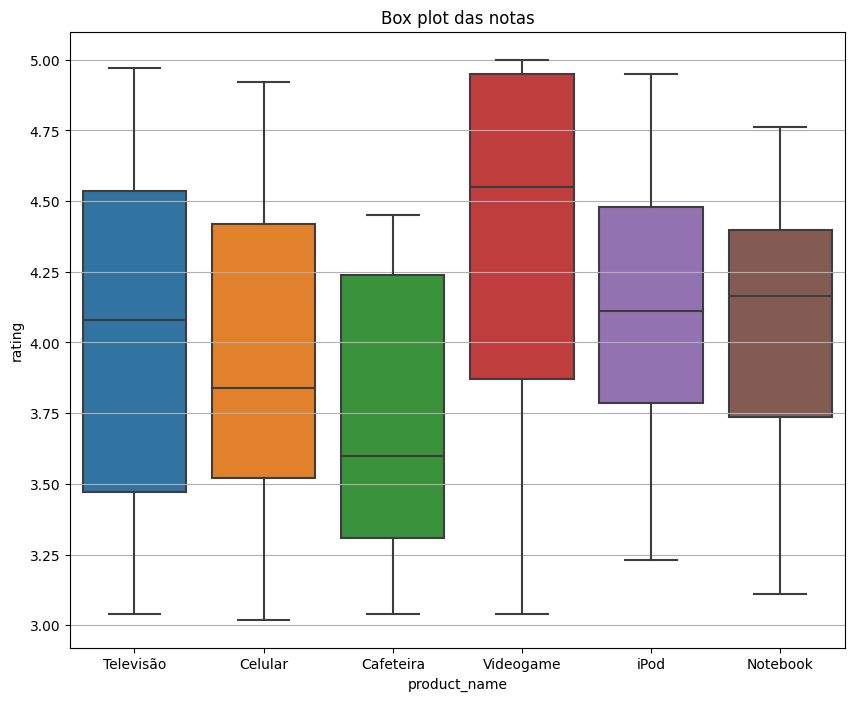

In [13]:

plt.figure(figsize=(10,8))
plt.grid()
plt.title('Box plot das notas')
sns.boxplot (x=x, y=y)

In [100]:
x = df[['rating','rating_count']]
y = df['purchased']

In [102]:
#Dividir dados em teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split (x,
                                                        y,
                                                         test_size=0.2,
                                                         random_state=42)

In [ ]:
#Treinamento do modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

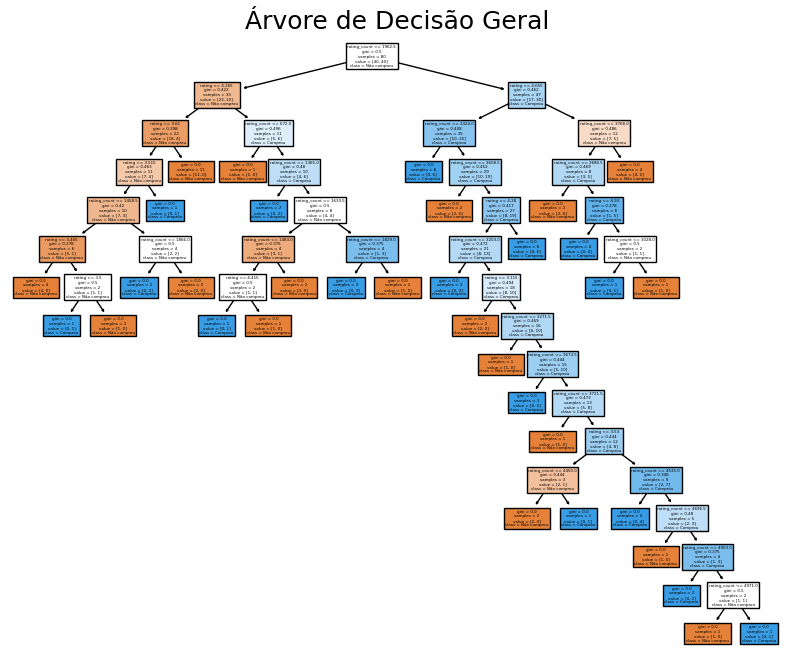

In [108]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão Geral', fontsize=18)
plt.show()

In [109]:
#Separando os dados da Televisão
xtv=df.loc[df['product_name'] == 'Televisão', ['rating','rating_count']]
ytv = df.loc[df['product_name'] == 'Televisão', 'purchased']

In [114]:
#Dividindo os dados em treino e teste
Xtv_treino, Xtv_teste, ytv_treino, ytv_teste = train_test_split (xtv,
                                                        ytv,
                                                         test_size=0.2,
                                                         random_state=42)

In [191]:
#Treinamento do modelo
modelo_tv = DecisionTreeClassifier()
modelo_tv.fit(Xtv_treino, ytv_treino)

previsoes_tv = modelo.predict(Xtv_teste) # dentro de modelo predict é colocoda os Xteste
previsoes_tv

array([1, 0, 0, 0], dtype=int64)

In [192]:
precisao_tv = precision_score(ytv_teste,previsoes_tv,pos_label=1)
precisao_tv

1.0

In [236]:
recall_tv = recall_score(ytv_teste,previsoes_tv,pos_label=1)
recall_tv

0.3333333333333333

In [235]:
f1score_tv= f1_score(ytv_teste,previsoes_tv,pos_label=1)
f1score_tv

0.5

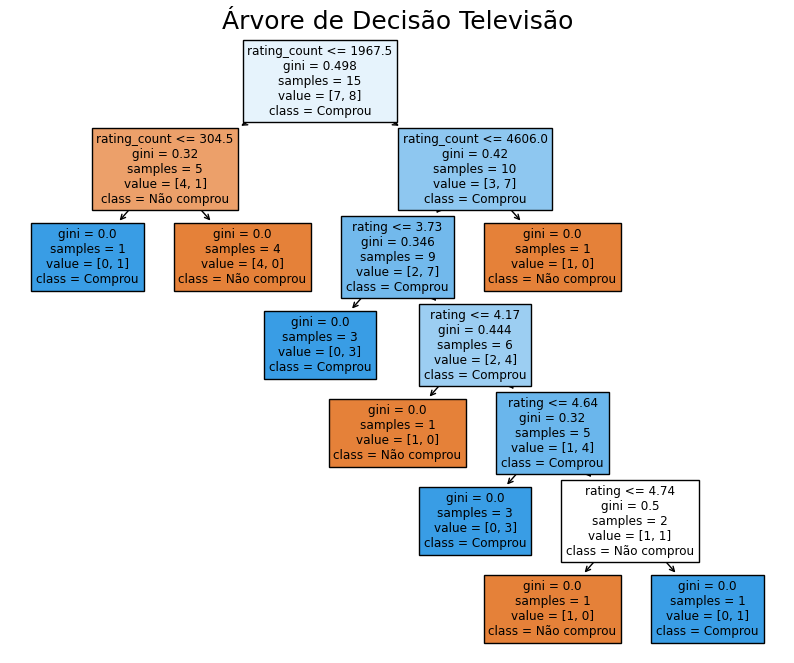

In [161]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo_tv, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão Televisão', fontsize=18)
plt.show()

In [116]:
#Separando os dados da Celular
xphone=df.loc[df['product_name'] == 'Celular', ['rating','rating_count']]
yphone = df.loc[df['product_name'] == 'Celular', 'purchased']

In [123]:
#Dividindo os dados em treino e teste
Xphone_treino, Xphone_teste, yphone_treino, yphone_teste = train_test_split (xphone,
                                                        yphone,
                                                         test_size=0.2,
                                                         random_state=42)

In [189]:
#Treinamento do modelo
modelo_phone = DecisionTreeClassifier()
modelo_phone.fit(Xphone_treino, yphone_treino)

previsoes_phone = modelo.predict(Xphone_teste) # dentro de modelo predict é colocoda os Xteste
previsoes_phone

array([1, 0], dtype=int64)

In [234]:
precisao_phone = precision_score(yphone_teste,previsoes_phone,pos_label=1)
precisao_phone

0.0

In [233]:
recall = recall_score(yphone_teste,previsoes_phone,pos_label=1)
recall

0.0

In [232]:
f1score_phone= f1_score(yphone_teste,previsoes_phone,pos_label=1)
f1score_phone

0.0

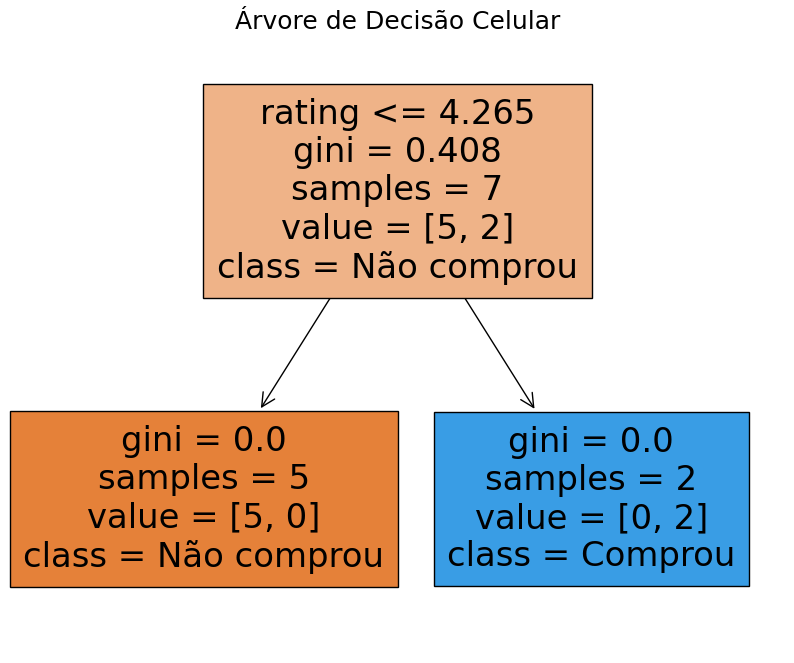

In [163]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo_phone, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão Celular', fontsize=18)
plt.show()

In [126]:
#Separando os dados da Cafeteira
xcaf=df.loc[df['product_name'] == 'Cafeteira', ['rating','rating_count']]
ycaf = df.loc[df['product_name'] == 'Cafeteira', 'purchased']

In [127]:
#Dividindo os dados em treino e teste
Xcaf_treino, Xcaf_teste, ycaf_treino, ycaf_teste = train_test_split (xcaf,
                                                        ycaf,
                                                         test_size=0.2,
                                                         random_state=42)

In [194]:
#Treinamento do modelo
modelo_caf = DecisionTreeClassifier()
modelo_caf.fit(Xcaf_treino, ycaf_treino)

previsoes_caf = modelo.predict(Xcaf_teste) # dentro de modelo predict é colocoda os Xteste
previsoes_caf

array([1, 0], dtype=int64)

In [195]:
precisao_caf = precision_score(ycaf_teste,previsoes_caf,pos_label=1)
precisao_caf

0.0

In [231]:
recall_caf = recall_score(ycaf_teste,previsoes_caf,pos_label=1)
recall_caf 

0.0

In [215]:
f1score_caf= f1_score(ycaf_teste,previsoes_caf,pos_label=1)
f1score_caf

0.0

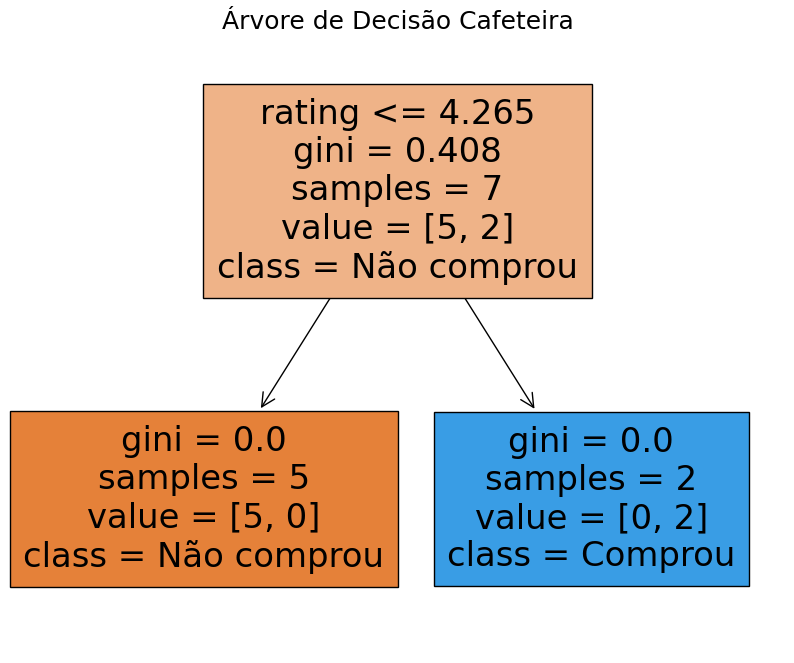

In [156]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo_caf, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão Cafeteira', fontsize=18)
plt.show()

In [144]:
#Separando os dados da VideoGame
xgame=df.loc[df['product_name'] == 'Videogame', ['rating','rating_count']]
ygame = df.loc[df['product_name'] == 'Videogame', 'purchased']

In [145]:
#Dividindo os dados em treino e teste
Xgame_treino, Xgame_teste, ygame_treino, ygame_teste = train_test_split(xgame,
                                                        ygame,
                                                         test_size=0.2,
                                                         random_state=42)

In [197]:
#Treinamento do modelo
modelo_game= DecisionTreeClassifier()
modelo_game.fit(Xgame_treino, ygame_treino)

previsoes_game = modelo.predict(Xgame_teste) # dentro de modelo predict é colocoda os Xteste
previsoes_game

array([0, 0, 1, 0], dtype=int64)

In [198]:
precisao_game = precision_score(ygame_teste,previsoes_game,pos_label=1)
precisao_game

1.0

In [223]:
recall_game = recall_score(ygame_teste,previsoes_game,pos_label=1)
recall_game

0.25

In [224]:
f1score_game= f1_score(ygame_teste,previsoes_game,pos_label=1)
f1score_game

0.4

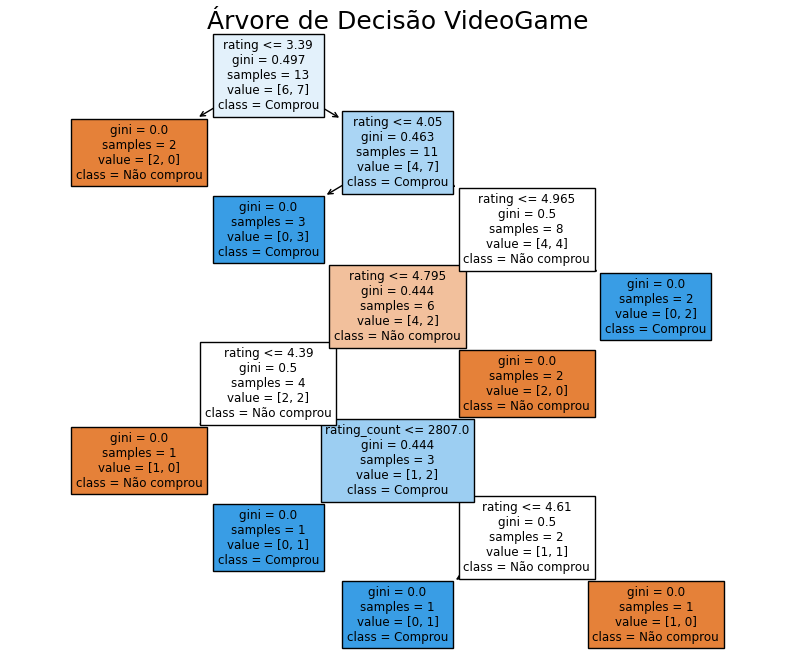

In [164]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo_game, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão VideoGame', fontsize=18)
plt.show()

In [150]:
#Separando os dados do Notebook
xnot=df.loc[df['product_name'] == 'Notebook', ['rating','rating_count']]
ynot = df.loc[df['product_name'] == 'Notebook', 'purchased']

In [151]:
#Dividindo os dados em treino e teste
Xnot_treino, Xnot_teste, ynot_treino, ynot_teste = train_test_split (xnot,
                                                        ynot,
                                                         test_size=0.2,
                                                         random_state=42)

In [199]:
#Treinamento do modelo
modelo_not= DecisionTreeClassifier()
modelo_not.fit(Xnot_treino, ynot_treino)

previsoes_not = modelo.predict(Xnot_teste) # dentro de modelo predict é colocoda os Xteste
previsoes_not

array([1, 1, 0, 0], dtype=int64)

In [201]:
precisao_not = precision_score(ynot_teste,previsoes_not,pos_label=1)
precisao_not

0.5

In [227]:
recall_not = recall_score(ynot_teste,previsoes_not,pos_label=1)
recall_not

1.0

In [226]:
f1score_not= f1_score(ynot_teste,previsoes_not,pos_label=1)
f1score_not

0.6666666666666666

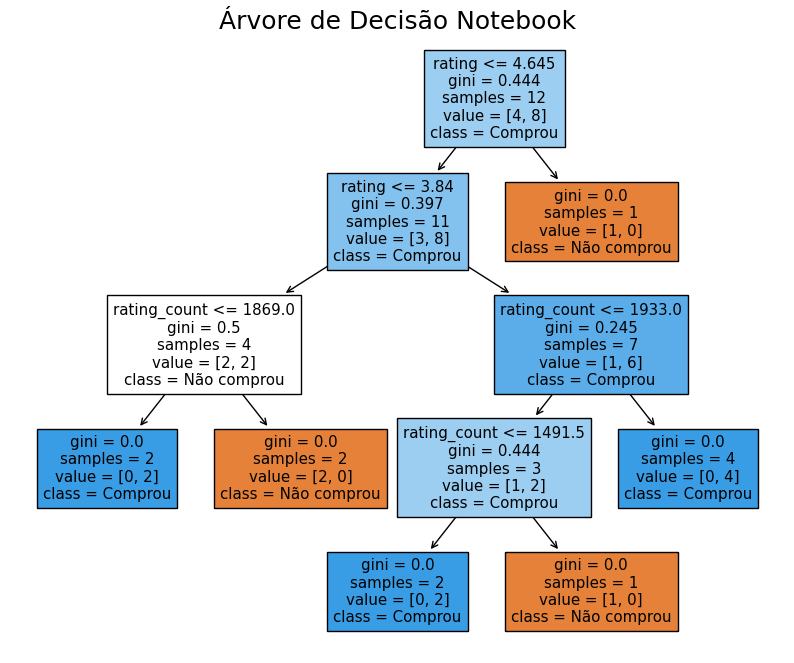

In [166]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo_not, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão Notebook', fontsize=18)
plt.show()

In [169]:
#Separando os dados do ipod
xIpod=df.loc[df['product_name'] == 'iPod', ['rating','rating_count']]
yIpod = df.loc[df['product_name'] == 'iPod', 'purchased']

In [170]:
#Dividindo os dados em treino e teste
Xipod_treino, Xipod_teste, yipod_treino, yipod_teste = train_test_split (xIpod,
                                                        yIpod,
                                                         test_size=0.2,
                                                         random_state=42)

In [205]:
#Treinamento do modelo
modelo_ipod= DecisionTreeClassifier()
modelo_ipod.fit(Xipod_treino, yipod_treino)

previsoes_ipod = modelo.predict(Xipod_teste) # dentro de modelo predict é colocoda os Xteste
previsoes_ipod

array([0, 0, 1, 1], dtype=int64)

In [206]:
precisao_iPod = precision_score(yipod_teste,previsoes_ipod,pos_label=1)
precisao_iPod

0.5

In [229]:
recall_ipod = recall_score(yipod_teste,previsoes_ipod,pos_label=1)
recall_ipod 

0.5

In [230]:
f1score_ipod= f1_score(yipod_teste,previsoes_ipod,pos_label=1)
f1score_ipod

0.5

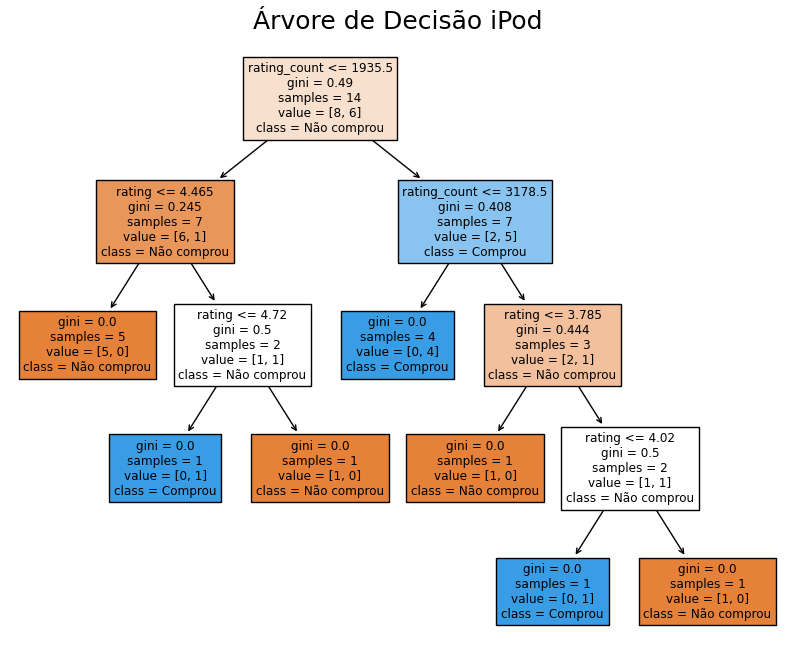

In [173]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo_ipod, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão iPod', fontsize=18)
plt.show()